In [1]:
##PROJJECT OF HEART DIEASE USING ML



In [2]:
##1)Problem definition ---> binary classificiation


In [3]:
# age
# sex
# chest pain type (4 values)
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,precision_score,accuracy_score,f1_score,recall_score,plot_roc_curve


In [5]:
#load data

df=pd.read_csv("./heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
#check nan values and numerical

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

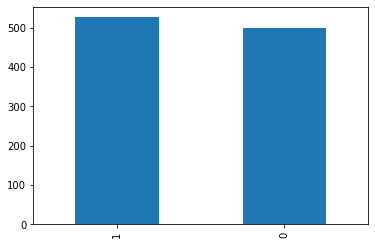

In [7]:
df["target"].value_counts().plot(kind="bar")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,86,413
1,226,300


Text(0.5, 1.0, 'Compare sex with Target of heart diease')

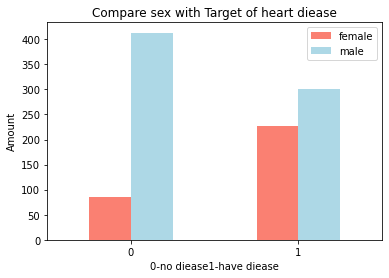

In [11]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",color=["salmon","lightblue"])
plt.legend(["female","male"])
plt.xlabel("0-no diease"'1-have diease')
plt.ylabel("Amount")
plt.xticks(rotation=0)

plt.title("Compare sex with Target of heart diease")

<AxesSubplot:ylabel='Frequency'>

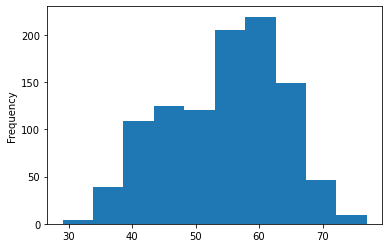

In [12]:
df["age"].plot(kind="hist")

In [13]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


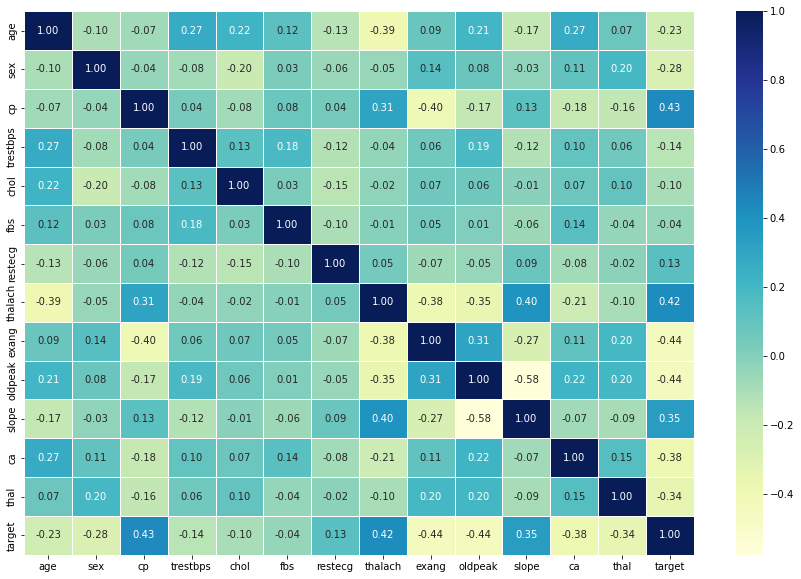

In [14]:
corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat,annot=True,
                   linewidths=0.5,
                   fmt=".2f",cmap="YlGnBu")

In [15]:
models={"Logistic regression":LogisticRegression(),"KNN ":KNeighborsClassifier(),"Random Forest Classifier":RandomForestClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores
        
x=df.drop('target',axis=1)
x
y=df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [16]:
model_score=fit_and_score(models,x_train,x_test,y_train,y_test)
model_score

C:\Users\lenovo\Documents\machineLearning\project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8585365853658536,
 'KNN ': 0.8097560975609757,
 'Random Forest Classifier': 1.0}

<AxesSubplot:>

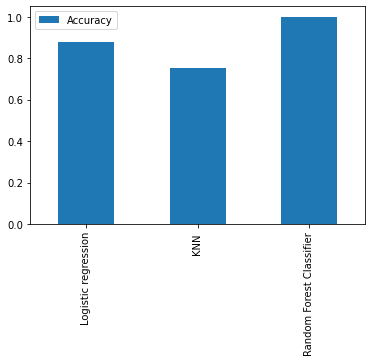

In [17]:
model_compare=pd.DataFrame(model_score,index=["Accuracy"])
model_compare.T.plot(kind="bar")

In [17]:
train_score=[]
test_score=[]
neihbours=range(1,20)
knn=KNeighborsClassifier()
for i in neihbours:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))


In [18]:
test_score

[1.0,
 0.9804878048780488,
 0.9121951219512195,
 0.8536585365853658,
 0.8097560975609757,
 0.8,
 0.7853658536585366,
 0.7658536585365854,
 0.7560975609756098,
 0.7609756097560976,
 0.7609756097560976,
 0.775609756097561,
 0.7560975609756098,
 0.7414634146341463,
 0.7658536585365854,
 0.7951219512195122,
 0.7707317073170732,
 0.7804878048780488,
 0.7658536585365854]

Text(0.5, 0, 'neighbours')

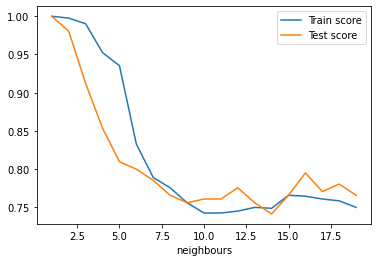

In [19]:
plt.plot(neihbours,train_score,label="Train score"),plt.plot(neihbours,test_score,label="Test score")
plt.legend()
plt.xlabel("neighbours")


In [20]:
log_reg={"C":np.logspace(-4,4,20),"solver":["liblinear"]
}

In [21]:
rf={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,2,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [22]:
np.random.seed(42)
rs_log=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg,cv=5,n_iter=20,verbose=True)
rs_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [23]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [24]:
rs_log.score(x_test,y_test)

0.848780487804878

In [25]:
np.random.seed(42)
rf_log=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf,cv=5,n_iter=20,verbose=True)
rf_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 2, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [26]:
rf_log.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [27]:
rf_log.score(x_test,y_test)

0.9658536585365853

In [28]:
model_score

{'Logistic regression': 0.8585365853658536,
 'KNN ': 0.8097560975609757,
 'Random Forest Classifier': 1.0}

In [29]:
grid_reg={"C":np.logspace(-4,4,30),"solver":["liblinear"]
}


np.random.seed(42)
rs_grid=GridSearchCV(LogisticRegression(),param_grid=grid_reg,cv=5,verbose=True)
rs_grid.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [30]:
rs_grid.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [31]:
rs_grid.score(x_test,y_test)

0.8439024390243902

In [43]:
grid_rf={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None],
    "min_samples_split":[5,10,15],
    "min_samples_leaf":[1,2,3]
}
np.random.seed(42)
rf_grid=GridSearchCV(RandomForestClassifier(),param_grid=grid_rf,cv=5,verbose=True)
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [33]:
y_pred=rs_grid.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0], dtype=int64)

C:\Users\lenovo\Documents\machineLearning\project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


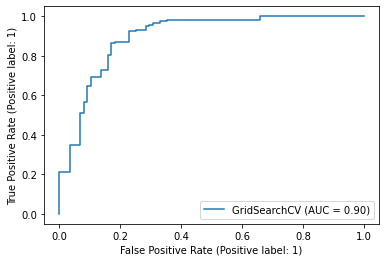

In [34]:
plot_roc_curve(rs_grid,x_test,y_test)

In [35]:
confusion_matrix(y_test,y_pred)

array([[ 60,  28],
       [  4, 113]], dtype=int64)

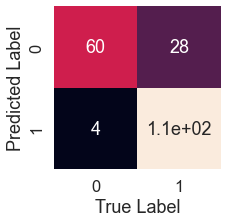

In [39]:
sns.set(font_scale=1.5)
def plot_con(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_con(y_test,y_pred)
    

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79        88
           1       0.80      0.97      0.88       117

    accuracy                           0.84       205
   macro avg       0.87      0.82      0.83       205
weighted avg       0.86      0.84      0.84       205



In [42]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [43]:
clf=LogisticRegression(C=0.03359818286283781,solver='liblinear')

In [49]:
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8439024390243903

In [51]:
cv_pre=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre


0.8079661016949153

In [52]:
cv_re=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_re=np.mean(cv_re)
cv_re

0.9126325247079963

In [53]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8570928891736067

<AxesSubplot:>

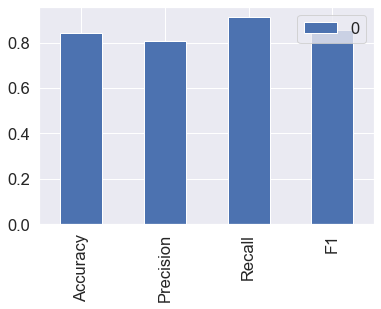

In [54]:
cv_metric=pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision":cv_pre,
    "Recall":cv_re,
    "F1":cv_f1
},index=[0])
cv_metric.T.plot(kind="bar")

In [55]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.03359818286283781, solver='liblinear')

In [56]:
clf.coef_

array([[ 0.00922534, -0.63380617,  0.6346411 , -0.01520641, -0.00326315,
        -0.05426431,  0.24616573,  0.02607914, -0.40891479, -0.48862975,
         0.27636223, -0.58218131, -0.53030628]])

In [57]:
feature_dic=dict(zip(df.columns,list(clf.coef_[0])))
feature_dic

{'age': 0.009225343890884169,
 'sex': -0.6338061666891263,
 'cp': 0.6346410999042499,
 'trestbps': -0.015206412279671485,
 'chol': -0.003263153299046984,
 'fbs': -0.05426430991721128,
 'restecg': 0.24616572514954915,
 'thalach': 0.026079138630147134,
 'exang': -0.4089147916974986,
 'oldpeak': -0.4886297495169593,
 'slope': 0.27636223199275495,
 'ca': -0.5821813130023151,
 'thal': -0.5303062824437306}

<AxesSubplot:title={'center':'Feature Importance'}>

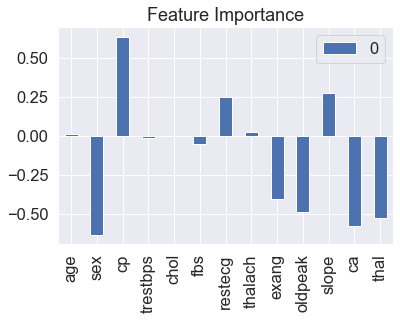

In [58]:
feature_df=pd.DataFrame(feature_dic,index=[0])
feature_df.T.plot(kind="bar",title="Feature Importance")